# Optimal Home-Run Zone By Alex Herbaugh

**Question**  
> What hitter traits (Exit Velocity, Launch Angle, Exit Direction) produce the highest probability of a home run?

**More information is attached in the readme**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("BattedBallData.csv")

### Creating a new is_homerun variable for binary analysis

In [4]:
df["is_homerun"] = (df["PLAY_OUTCOME"] == "HomeRun").astype(int)

In [5]:
df.head()

,BATTER_ID,BATTER,PITCHER_ID,PITCHER,GAME_DATE,LAUNCH_ANGLE,EXIT_SPEED,EXIT_DIRECTION,HIT_DISTANCE,HANG_TIME,HIT_SPIN_RATE,PLAY_OUTCOME,VIDEO_LINK,is_homerun
0,475174,"Alonso, Yonder",502190,"Leake, Mike",4/1/2018,5.072865,82.25887,38.028120,72.89500,0.650,4206.183,Out,https://coach-video.mlb.com/mlb/2018/04/01/e04...,0
1,592387,"Healy, Ryon",545333,"Bauer, Trevor",4/1/2018,-4.772407,103.76580,7.277498,27.81848,0.181,0.000,Out,https://coach-video.mlb.com/mlb/2018/04/01/e04...,0
2,543829,"Gordon, Dee",545333,"Bauer, Trevor",4/1/2018,43.175030,87.28809,-33.080960,279.88180,5.316,4577.965,Out,https://coach-video.mlb.com/mlb/2018/04/01/e04...,0
3,516416,"Segura, Jean",545333,"Bauer, Trevor",4/1/2018,-4.826100,85.95699,22.025790,20.33284,0.155,0.000,Single,https://coach-video.mlb.com/mlb/2018/04/01/e04...,0
4,592387,"Healy, Ryon",580792,"Goody, Nick",4/1/2018,-7.276263,75.25285,-20.377580,17.17714,0.146,0.000,Out,https://coach-video.mlb.com/mlb/2018/04/01/e04...,0


### Out of the 7917 rows in our dataset, 357 were a homerun

In [6]:
hr = df[df["is_homerun"] == 1][["EXIT_SPEED", "LAUNCH_ANGLE", "EXIT_DIRECTION"]]
display(hr.describe())

,EXIT_SPEED,LAUNCH_ANGLE,EXIT_DIRECTION
count,357.000000,357.000000,357.000000
mean,104.588547,27.895524,-2.389565
std,4.641949,5.175591,28.067827
min,91.141740,16.264800,-47.000030
25%,101.423500,23.807580,-27.601340
50%,105.002800,27.527980,-6.783767
75%,107.859500,31.702530,22.807610
max,117.941800,43.458560,46.051440


### Using 25% to 75% (1st quartile to 3rd quartile) to avoid outliers

In [7]:
q1_speed, q3_speed = hr["EXIT_SPEED"].quantile([0.25, 0.75])
q1_angle, q3_angle = hr["LAUNCH_ANGLE"].quantile([0.25, 0.75])
q1_dir, q3_dir = hr["EXIT_DIRECTION"].quantile([0.25, 0.75])

In [8]:
print("Optimal ranges:")
print(f"Exit Velocity : {q1_speed:.2f} – {q3_speed:.2f} mph")
print(f"Launch Angle  : {q1_angle:.2f} – {q3_angle:.2f}°")
print(f"Exit Direction: {q1_dir:.2f} – {q3_dir:.2f}°")

Optimal ranges:
Exit Velocity : 101.42 – 107.86 mph
Launch Angle  : 23.81 – 31.70°
Exit Direction: -27.60 – 22.81°


### 57.14% of balls hit within our defined optimal ranges resulted in a home run.

This is a huge increase compared to the **overall HR rate**, which hovers around **4–5%** in the full dataset.

In [9]:
optimal_zone = df[
    (df["EXIT_SPEED"].between(q1_speed, q3_speed)) &
    (df["LAUNCH_ANGLE"].between(q1_angle, q3_angle)) &
    (df["EXIT_DIRECTION"].between(q1_dir, q3_dir))
]
success_rate = optimal_zone["is_homerun"].mean()
print(f"Success rate inside sweet spot: {success_rate:.2%}")

Success rate inside sweet spot: 57.14%


In [10]:
examples = optimal_zone[
    (optimal_zone["is_homerun"] == 1) &
    (optimal_zone["EXIT_SPEED"].between(104, 108)) &
    (optimal_zone["LAUNCH_ANGLE"].between(26, 28)) &
    (optimal_zone["EXIT_DIRECTION"].between(-20, 20))
].sort_values("EXIT_SPEED", ascending=False).head(3)

In [11]:
non_hr = df[df["is_homerun"] == 0]  

### Matching each home run to a closest match non-home run for comparison

In [12]:
paired_rows = []
for _, hr_row in examples.iterrows():
    diff = (non_hr["EXIT_SPEED"] - hr_row["EXIT_SPEED"]).abs() + \
           (non_hr["LAUNCH_ANGLE"] - hr_row["LAUNCH_ANGLE"]).abs() + \
           (non_hr["EXIT_DIRECTION"] - hr_row["EXIT_DIRECTION"]).abs()
    
    nh_row = non_hr.loc[diff.idxmin()]
    paired_rows.append((hr_row, nh_row))

    print(f"\n{hr_row['BATTER']}  |  HR")
    print(f"  EV:  {hr_row['EXIT_SPEED']:.1f} mph")
    print(f"  LA:  {hr_row['LAUNCH_ANGLE']:.1f}°")
    print(f"  Dir: {hr_row['EXIT_DIRECTION']:.1f}°")
    print(f"  Dist: {hr_row['HIT_DISTANCE']:.0f} ft")
    print(f"  Video: {hr_row['VIDEO_LINK']}")

    print("--- CLOSEST NON-HR CONTACT ---")
    print(f"{nh_row['BATTER']} | Not HR")
    print(f"  EV:  {nh_row['EXIT_SPEED']:.1f} mph")
    print(f"  LA:  {nh_row['LAUNCH_ANGLE']:.1f}°")
    print(f"  Dir: {nh_row['EXIT_DIRECTION']:.1f}°")
    print(f"  Dist: {nh_row['HIT_DISTANCE']:.0f} ft")
    print(f"  Video: {nh_row['VIDEO_LINK']}")


Davis, Khris  |  HR
  EV:  106.8 mph
  LA:  27.2°
  Dir: 10.4°
  Dist: 415 ft
  Video: https://coach-video.mlb.com/mlb/2018/04/14/19ba1009/17dc3c46/video_1523673404363_4500k.mp4
--- CLOSEST NON-HR CONTACT ---
Goldschmidt, Paul | Not HR
  EV:  106.5 mph
  LA:  27.0°
  Dir: 7.2°
  Dist: 407 ft
  Video: https://coach-video.mlb.com/mlb/2018/04/11/8928cb48/eb47499e/video_1523485515415_4500k.mp4

Chapman, Matt  |  HR
  EV:  106.5 mph
  LA:  27.5°
  Dir: -7.0°
  Dist: 402 ft
  Video: https://coach-video.mlb.com/mlb/2018/04/14/19ba1009/f807da64/video_1523678779192_4500k.mp4
--- CLOSEST NON-HR CONTACT ---
Williams, Nick | Not HR
  EV:  105.0 mph
  LA:  25.4°
  Dir: -7.0°
  Dist: 415 ft
  Video: https://coach-video.mlb.com/mlb/2018/04/14/795c4db0/e079187e/video_1523745388606_4500k.mp4

Hicks, Aaron  |  HR
  EV:  105.0 mph
  LA:  27.4°
  Dir: 14.3°
  Dist: 408 ft
  Video: https://coach-video.mlb.com/mlb/2018/04/13/d7f1fb6c/10826b19/video_1523662353493_4500k.mp4
--- CLOSEST NON-HR CONTACT ---
Spr

### For the sake of time, I use AI here to help generate example Graphs & Diagrams to visualize my work
Prompt: Using my provided code, please generate example graphs and diagrams that will allow me to visualize my findings. Showing differences in my closest-match comparisons, alongside a full visulization of all datapoints with the optimal range I have calculated.

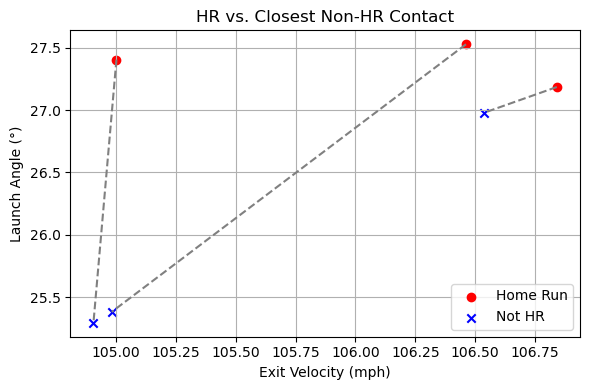

In [17]:
plt.figure(figsize=(6, 4))
for hr_row, nh_row in paired_rows:
    plt.scatter(hr_row["EXIT_SPEED"], hr_row["LAUNCH_ANGLE"],
                marker="o", color="red",  label="Home Run"
                if "Home Run" not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.scatter(nh_row["EXIT_SPEED"], nh_row["LAUNCH_ANGLE"],
                marker="x", color="blue", label="Not HR"
                if "Not HR" not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.plot([hr_row["EXIT_SPEED"], nh_row["EXIT_SPEED"]],
             [hr_row["LAUNCH_ANGLE"], nh_row["LAUNCH_ANGLE"]],
             linestyle="--", color="gray")

plt.xlabel("Exit Velocity (mph)")
plt.ylabel("Launch Angle (°)")
plt.title("HR vs. Closest Non-HR Contact")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

### The optimal zone we calculated is the highlighted rectangle

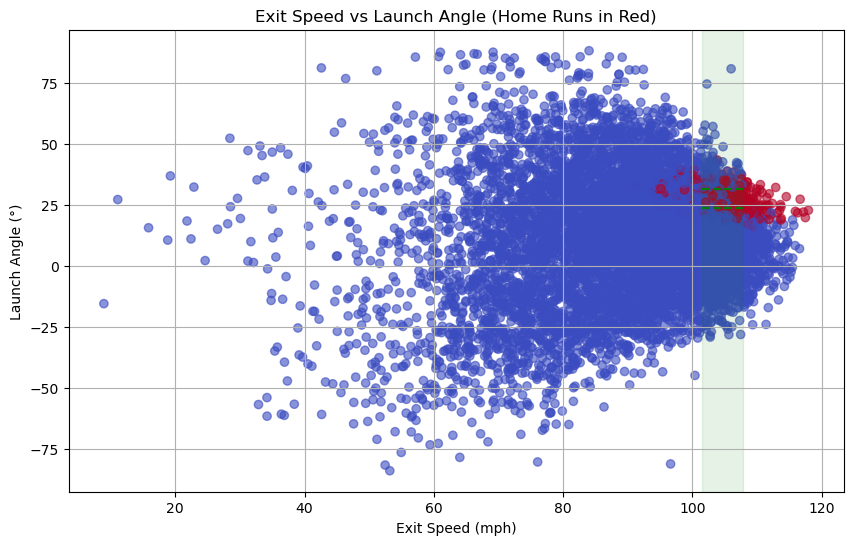

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df["EXIT_SPEED"], df["LAUNCH_ANGLE"], c=df["is_homerun"], cmap="coolwarm", alpha=0.6)
plt.xlabel("Exit Speed (mph)")
plt.ylabel("Launch Angle (°)")
plt.title("Exit Speed vs Launch Angle (Home Runs in Red)")
plt.grid(True)

plt.axvspan(101.42, 107.86, color='green', alpha=0.1)
plt.hlines([23.81, 31.70], xmin=101.42, xmax=107.86, colors='green', linestyles='--')

plt.show()